In [12]:
using Jacobi
using PyPlot


In [13]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

ψj (generic function with 1 method)

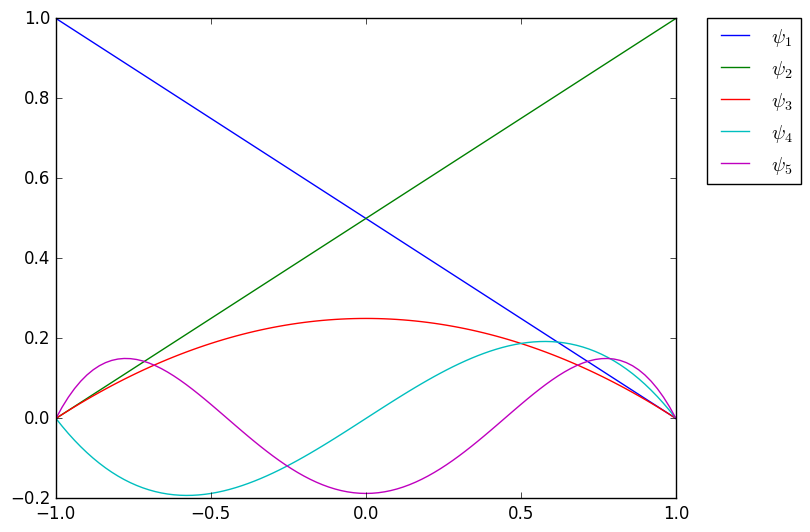

In [14]:
xx = linspace(-1,1,101)

for i in 1:5
    plot(xx,[ψj(i,xx,0) for xx in xx],label = "\$ \\psi_$i \$");
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
end

In [15]:
mass_matrix(a,b) = [(b^3 - a^3)/2 (-3*a^4 + 2*a^2 + 3*b^4 - 2*b^2)/8;
                    (-3*a^4 + 2*a^2 + 3*b^4 - 2*b^2)/8  (b^3 - a^3)/2]

mass_matrix (generic function with 1 method)

In [16]:
Nel = 4
a = -1.0
b = 1.0
Ndof = Nel + 1
xn = [linspace(a,b,Nel+1);];
idx = 2:Ndof-1

2:4

In [17]:

dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x4 Array{Int64,2}:
 1  2  3  4
 2  3  4  5

In [18]:

#diags
dl = zeros(Ndof-1)
dp = zeros(Ndof)

##
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            if kg == ig #principal
                dp[kg] +=  + Me[k,i]
            end
            if kg == ig + 1 && kg > 1#low
                dl[kg-1] += + Me[k,i]
            end
        end
    end
end

Tri_dM = SymTridiagonal(dp,dl) 

5x5 SymTridiagonal{Float64}:
  0.4375    -0.164063    0.0         0.0        0.0     
 -0.164063   0.5         0.0390625   0.0        0.0     
  0.0        0.0390625   0.125      -0.0390625  0.0     
  0.0        0.0        -0.0390625   0.5        0.164063
  0.0        0.0         0.0         0.164063   0.4375  

In [19]:
Me = mass_matrix(xn[2], xn[2+1])

2x2 Array{Float64,2}:
 0.0625     0.0390625
 0.0390625  0.0625   

In [20]:
dof_map

2x4 Array{Int64,2}:
 1  2  3  4
 2  3  4  5

In [21]:

#diags
dl = zeros(Ndof-1)
dp = zeros(Ndof)

##
M = zeros(Ndof,Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            M[kg,ig] += Me[k,i]
        end
    end
end


## Montar o lado direito da equação:

In [22]:
fun(x) = sin(2*pi*x)
fe = fun(xn);

In [23]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        



## Solução do problema

In [24]:
u = Tri_dM\F ;


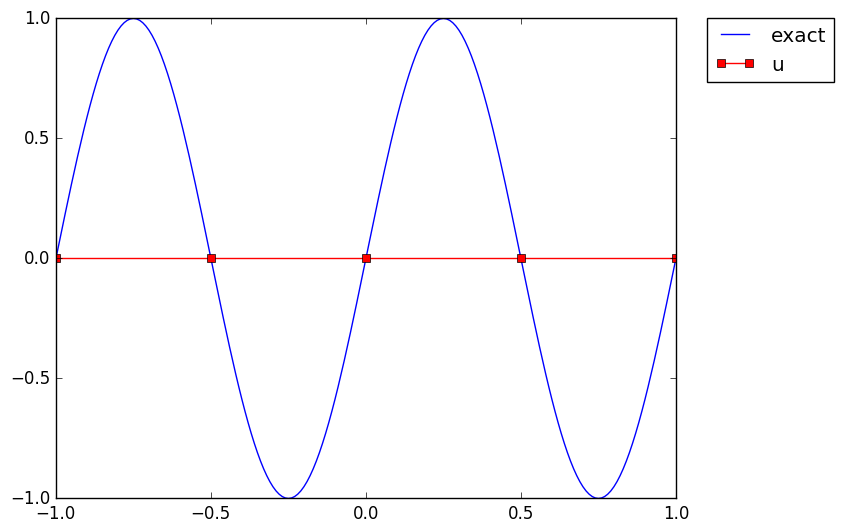

PyObject <matplotlib.legend.Legend object at 0x7f278f02ce50>

In [25]:

xx = linspace(a, b, 201)
plot(xx, fun(xx),label="exact")
plot(xn, u, "rs-",label = "u")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [26]:
maxabs(u - fun(xn))

2.465190328815662e-32